In [1]:
#pip install tf_keras

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2024-05-04 08:43:09.203159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 08:43:09.203260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 08:43:09.337265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
print(tf.__version__)

2.15.0


In [5]:
df = pd.read_csv("/kaggle/input/website-classification/website_classification.csv")

In [6]:
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [7]:
df.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [8]:
df = df.drop(columns=['Unnamed: 0','website_url'])

In [9]:
df.head()

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cleaned_website_text  1408 non-null   object
 1   Category              1408 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB


<Axes: xlabel='Category'>

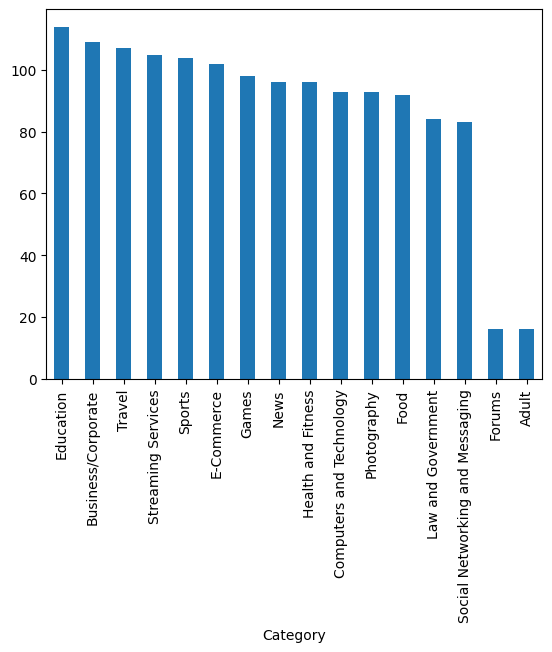

In [11]:
counts = df['Category'].value_counts()
counts.plot(kind='bar')

In [12]:
#dropping rows with less samples
mask = (df['Category'] == 'Adult') | (df['Category'] == 'Forums')
idx_to_drop = df.index[mask]
cleaned_df = df.drop(idx_to_drop)

<Axes: xlabel='Category'>

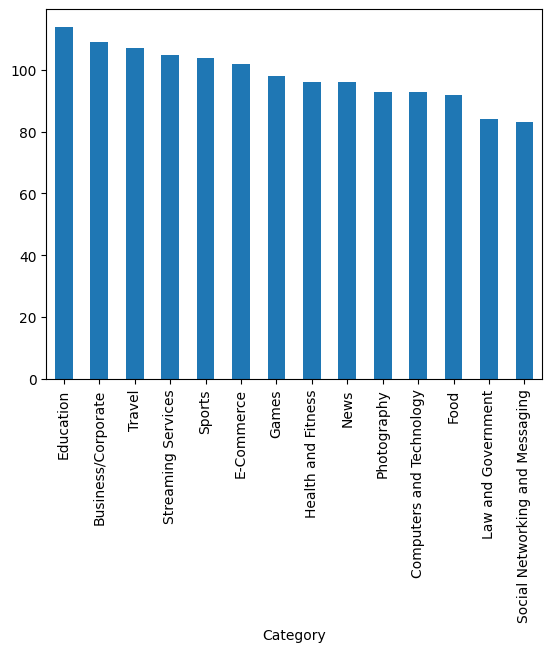

In [13]:
counts = cleaned_df['Category'].value_counts()
counts.plot(kind='bar')

In [14]:
#df_one_hot_encode=pd.get_dummies(cleaned_df,columns=['Category'])

In [15]:
#df_one_hot_encode.head()

In [16]:
#df_one_hot_encode.dtypes

In [17]:
# for i in df_one_hot_encode.columns:
#     if df_one_hot_encode[i].dtype in ['bool']:
#         print(f"Converting bool to 0 and 1s for {i}")
#         df_one_hot_encode[i] = df_one_hot_encode[i].astype(int)

# Splitting the data into Train/Val/Test 

In [18]:
# X = df_one_hot_encode['cleaned_website_text'].to_numpy()
# y = df_one_hot_encode.drop(columns=['cleaned_website_text']).to_numpy()

X = cleaned_df['cleaned_website_text'].to_numpy()
y = cleaned_df['Category'].to_numpy()

In [19]:
X.shape,y.shape

((1376,), (1376,))

In [20]:
# First split: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

# Second split: Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42,shuffle=True)

In [21]:
len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val)

(935, 276, 165, 935, 276, 165)

In [22]:
X_train[:2],y_train[:2]

(array(['live video chat room simple easy tinychat chat room flash ajax free live community chatroom chatline service software voice video webcam talk social network web video chat tinychat easy free video chat room browse free video chat room meet friend chat room download signup problem try pro free tinychat online video chat community promote pro day access premium feature high quality fullscreen video green coloured nickname advertisement pro badge start free trial subscription renew automatically cancel cancel subscription trial anytime cancel subscription account setting hour end trial subscription period avoid charge subscription trial period automatically renew pay subscription note unused portion trial period offer forfeit purchase premium subscription trial period subscription payment charge account confirmation purchase commencement renewal term information privacy policy term service upgrade promote room store live directory instant room sign text text discover meet friendl

In [28]:

# Extract labels ("Category" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y_train)
val_labels_encoded = label_encoder.transform(y_val)
test_labels_encoded = label_encoder.transform(y_test)

# Check what training labels look like
val_labels_encoded

array([ 5,  2, 11, 13,  9,  3, 10,  4,  4,  2, 12,  3,  2,  8,  5, 12, 10,
        2, 11,  9, 12,  2,  6,  7, 12, 11, 12, 11,  2, 10,  2,  9,  7,  0,
       12,  0, 11,  6, 11,  2, 13,  8, 10,  7,  5, 12, 13,  8,  4,  1,  9,
        0,  5,  7,  2,  1, 11, 13,  7, 13,  5,  0, 12,  9,  8, 12, 12, 10,
        5, 13,  4,  8, 11, 10,  3,  4, 11, 13,  0, 10,  1, 11,  1, 10,  4,
        9,  0,  5, 11, 12,  2,  0,  8,  3,  3,  0,  2,  4,  5,  6,  1,  0,
        8, 11, 12,  2,  6,  5,  0,  9,  9, 13,  5, 12, 10,  8, 12,  3,  3,
        3,  7,  4,  2,  8,  2,  3,  6,  0,  3,  6,  1,  0,  0,  6,  4,  2,
       11,  2,  9,  9, 11,  4,  4,  3,  0,  8,  2,  2, 12,  9,  0,  9, 11,
        0,  3, 12,  5, 13, 11, 12, 10,  2, 12,  3,  3])

In [29]:

# One hot encode labels -> CategoricalCrossentropy else use SparseCategoricalCrossentropy with label encoding
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(y_val.reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(y_test.reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Base Model using Naive Bayes

In [36]:
X_train.shape,train_labels_encoded.shape

((935,), (935,))

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_nb = Pipeline([
                      ("tf-idf", TfidfVectorizer()),
                      ("clf", MultinomialNB())
    ])

# Fit the pipeline to the training data
model_nb.fit(X=X_train, 
            y=train_labels_encoded);

In [39]:
baseline_score = model_nb.score(X_val, val_labels_encoded)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 92.12%


In [41]:
model_nb.score(X_test, y_test)
baseline_score = model_nb.score(X_test, test_labels_encoded)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 92.75%


# Using RNN LSTM Model

In [29]:
# How long is each sentence - First 5 sentences?
sent_lens = [len(sentence.split()) for sentence in X_train]
sent_lens[:5]

[167, 176, 20, 2496, 205]

In [30]:
# Find average number of tokens (words) in training dataset
round(sum([len(i.split()) for i in X_train])/len(X_train))

747

In [31]:
# another way to find average
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

746.8278074866311

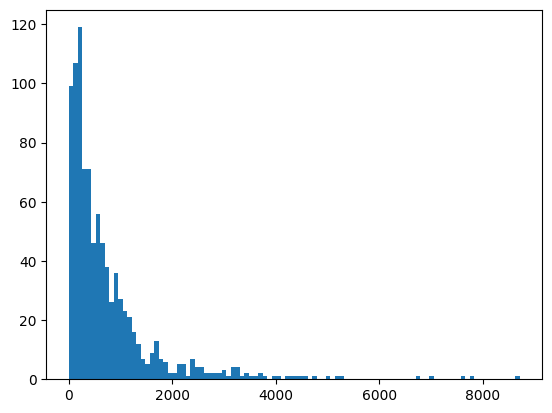

In [32]:

# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=100);

In [33]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

2538

In [34]:
unique_words=set()
[unique_words.update(sentence.split()) for sentence in X_train]

unique_words_list = list(unique_words)
print(unique_words_list[:5])
len(unique_words)

['frankenstein', 'accidentally', 'decibel', 'calbridge', 'maguey']


47662

# Tokenize the word

In [48]:
max_vocab_length = 20000
sentence_length = 400
no_of_classes = 14

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", 
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=sentence_length) 
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [50]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [51]:
# Choose a random sentence from the training dataset and tokenize it
import random
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
fashion nova fashion online woman affordable women clothing fashion nova fashion nova online fashion store woman shop sexy club dress jean shoe bodysuit skirt cheap amp affordable fashion online currency skip content woman curve men kids beauty usd aed l aoa kz aud cad chf chf clp      

Vectorized version:


<tf.Tensor: shape=(1, 400), dtype=int64, numpy=
array([[  449,  5417,   449,    12,   218,  2218,   269,  1789,   449,
         5417,   449,  5417,    12,   449,   185,   218,   103,  4669,
          358,  1052,  3527,  3098,     1,  3238,  1154,  2319,  2218,
          449,    12,  1513,   453,    95,   218,  5093,   756,   661,
          880,  1399, 17263,  1420,     1,     1, 14575,  4325, 12801,
        12801,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [52]:
_# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 20000
Top 5 most common words: ['', '[UNK]', 'news', 'new', 'december']
Bottom 5 least common words: ['escoffier', 'escobar', 'escarpment', 'escapades', 'esc']


# Creating an embedding layer

In [53]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=sentence_length, # how long is each input
                             name="embedding_1") 

embedding

# Creating a LSTM Model

In [82]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_val, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(14,), dtype=tf.float64, name=None))>

In [83]:

# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 14), dtype=tf.float64, name=None))>

In [84]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_rnn_embedding = layers.Embedding(input_dim=max_vocab_length, 
                             output_dim=128, 
                             embeddings_initializer="uniform", #
                             input_length=sentence_length, 
                             name="embedding_1") 


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = model_rnn_embedding(x)
print(x.shape)
x = layers.LSTM(128, return_sequences=True)(x) # (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) 
print(x.shape)

outputs = layers.Dense(no_of_classes, activation="softmax")(x)
model_rnn = tf.keras.Model(inputs, outputs, name="model_rnn_LSTM")

(None, 400, 128)
(None, 64)


In [85]:
# Compile model
model_rnn.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [86]:
model_rnn.summary()

Model: "model_rnn_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 400)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 400, 128)          2560000   
                                                                 
 lstm_14 (LSTM)              (None, 400, 128)          131584    
                                                                 
 lstm_15 (LSTM)              (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 14)                910       
                                                    

In [87]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
checkpoint_callback = ModelCheckpoint(filepath='model_rnn', monitor='val_accuracy', save_best_only=True)

In [88]:
# Fit the model
model_rnn_history = model_rnn.fit(train_dataset,
                              steps_per_epoch=int(len(train_dataset)), 
                              epochs=150,
                              validation_data=valid_dataset,
                              validation_steps=int(len(valid_dataset)),
                             callbacks=[early_stopping_callback, checkpoint_callback]) 

print("Model training done")

Epoch 1/150
30/30 [==============================] - 14s 371ms/step - loss: 2.6155 - accuracy: 0.0920 - val_loss: 2.5690 - val_accuracy: 0.1273
Epoch 2/150
30/30 [==============================] - 1s 46ms/step - loss: 2.4642 - accuracy: 0.1337 - val_loss: 2.4652 - val_accuracy: 0.1273
Epoch 3/150
30/30 [==============================] - 1s 46ms/step - loss: 2.3109 - accuracy: 0.1540 - val_loss: 2.4589 - val_accuracy: 0.1030
Epoch 4/150
30/30 [==============================] - 8s 289ms/step - loss: 2.2695 - accuracy: 0.2096 - val_loss: 2.4232 - val_accuracy: 0.1636
Epoch 5/150
30/30 [==============================] - 1s 47ms/step - loss: 2.1427 - accuracy: 0.2706 - val_loss: 2.4269 - val_accuracy: 0.1333
Epoch 6/150
30/30 [==============================] - 1s 46ms/step - loss: 2.0318 - accuracy: 0.3241 - val_loss: 2.5173 - val_accuracy: 0.1152
Epoch 7/150
30/30 [==============================] - 7s 257ms/step - loss: 1.7812 - accuracy: 0.3850 - val_loss: 2.6309 - val_accuracy: 0.2182
Ep

# Using Birection LSTM

In [89]:
# Create LSTM model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = model_rnn_embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x) # (you can stack RNN cells as long as return_sequences=True)
x = layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(no_of_classes, activation="softmax")(x)
model_bidirectional = tf.keras.Model(inputs, outputs, name="model_rnn_LSTM")

(None, 400, 128)
(None, 128)


In [90]:
# Compile model
model_bidirectional.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [91]:
# Fit the model
model_bidirectional_history = model_bidirectional.fit(train_dataset,
                              steps_per_epoch=int(len(train_dataset)), 
                              epochs=100,
                              validation_data=valid_dataset,
                              validation_steps=int(len(valid_dataset)),
                              callbacks=[early_stopping_callback, checkpoint_callback]) 

print("Model training done")

Epoch 1/100
30/30 [==============================] - 32s 889ms/step - loss: 2.3479 - accuracy: 0.3144 - val_loss: 1.9688 - val_accuracy: 0.3515
Epoch 2/100
30/30 [==============================] - 22s 758ms/step - loss: 1.3144 - accuracy: 0.6364 - val_loss: 1.5269 - val_accuracy: 0.5030
Epoch 3/100
30/30 [==============================] - 22s 756ms/step - loss: 0.7123 - accuracy: 0.8332 - val_loss: 1.3904 - val_accuracy: 0.5455
Epoch 4/100
30/30 [==============================] - 22s 763ms/step - loss: 0.4424 - accuracy: 0.9070 - val_loss: 1.3091 - val_accuracy: 0.5818
Epoch 5/100
30/30 [==============================] - 23s 787ms/step - loss: 0.2649 - accuracy: 0.9519 - val_loss: 1.3243 - val_accuracy: 0.5939
Epoch 6/100
30/30 [==============================] - 23s 778ms/step - loss: 0.1722 - accuracy: 0.9733 - val_loss: 1.0895 - val_accuracy: 0.6424
Epoch 7/100
30/30 [==============================] - 21s 728ms/step - loss: 0.1296 - accuracy: 0.9775 - val_loss: 0.9010 - val_accuracy:

In [101]:
## From the last step: You can see the val accuracy stands at 68.48%
loss, accuracy = model_bidirectional.evaluate(X_val, val_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

loss, accuracy = model_bidirectional.evaluate(X_test, test_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 33ms/step - loss: 1.0706 - accuracy: 0.6848
Model loss on the test set: 1.0705926418304443
Model accuracy on the test set: 68.48%
9/9 [==============================] - 0s 37ms/step - loss: 0.9793 - accuracy: 0.7428
Model loss on the test set: 0.9793415665626526
Model accuracy on the test set: 74.28%


In [98]:
# Loading the best model
best_model_birection =  tf.keras.models.load_model('model_rnn')

In [102]:
# This is from the best model which is saved based on validation accuracy. You can see its matching 75.15%
loss, accuracy = best_model_birection.evaluate(X_val, val_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

loss, accuracy = best_model_birection.evaluate(X_test, test_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 0s 35ms/step - loss: 1.0063 - accuracy: 0.7515
Model loss on the test set: 1.006278157234192
Model accuracy on the test set: 75.15%
9/9 [==============================] - 0s 37ms/step - loss: 1.0164 - accuracy: 0.7391
Model loss on the test set: 1.0164421796798706
Model accuracy on the test set: 73.91%


# Using Pre Trained Embedded layer

In [103]:

# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [142]:

# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
x = layers.Dense(64, activation="relu")(x)
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(no_of_classes, activation="softmax")(x) # create the output layer
model_pre_trained = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_pre_trained.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [143]:
model_pre_trained.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_28 (Dense)            (None, 128)               65664     
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dense_30 (Dense)            (None, 14)                910       
                                                                 
Total params: 256872654 (979.89 MB)
Trainable params: 74830 (292.30 KB)
Non-trainable params: 256797824 (979.61 MB)
_________

In [144]:
model_pre_trained.fit(train_dataset,
                      steps_per_epoch=int(len(train_dataset)), 
                      epochs=50,
                      validation_data=valid_dataset,
                      validation_steps=int(len(valid_dataset)),
                      callbacks=[early_stopping_callback, checkpoint_callback]) 

Epoch 1/50
30/30 [==============================] - 5s 128ms/step - loss: 2.5770 - accuracy: 0.2000 - val_loss: 2.4774 - val_accuracy: 0.2303
Epoch 2/50
30/30 [==============================] - 3s 113ms/step - loss: 2.3123 - accuracy: 0.3594 - val_loss: 2.0997 - val_accuracy: 0.5212
Epoch 3/50
30/30 [==============================] - 3s 111ms/step - loss: 1.8406 - accuracy: 0.6075 - val_loss: 1.5820 - val_accuracy: 0.7152
Epoch 4/50
30/30 [==============================] - 3s 112ms/step - loss: 1.3085 - accuracy: 0.7604 - val_loss: 1.1258 - val_accuracy: 0.7455
Epoch 5/50
30/30 [==============================] - 3s 110ms/step - loss: 0.9028 - accuracy: 0.8364 - val_loss: 0.8579 - val_accuracy: 0.7939
Epoch 6/50
30/30 [==============================] - 3s 111ms/step - loss: 0.6539 - accuracy: 0.8781 - val_loss: 0.7196 - val_accuracy: 0.8182
Epoch 7/50
30/30 [==============================] - 3s 112ms/step - loss: 0.5028 - accuracy: 0.9005 - val_loss: 0.6480 - val_accuracy: 0.7939
Epoch 

In [145]:
# Loading the best model
best_model_pre_trained =  tf.keras.models.load_model('model_rnn')

In [146]:
## From the last step: You can see the val accuracy stands at 68.48%
loss, accuracy = model_pre_trained.evaluate(X_val, val_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

loss, accuracy = model_pre_trained.evaluate(X_test, test_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 1s 58ms/step - loss: 0.5185 - accuracy: 0.8424
Model loss on the test set: 0.5184541940689087
Model accuracy on the test set: 84.24%
9/9 [==============================] - 1s 101ms/step - loss: 0.4314 - accuracy: 0.8877
Model loss on the test set: 0.43140777945518494
Model accuracy on the test set: 88.77%


In [147]:
## From the last step: You can see the val accuracy stands at 68.48%
loss, accuracy = best_model_pre_trained.evaluate(X_val, val_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

loss, accuracy = best_model_pre_trained.evaluate(X_test, test_labels_one_hot)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

6/6 [==============================] - 1s 58ms/step - loss: 0.5362 - accuracy: 0.8545
Model loss on the test set: 0.5361579060554504
Model accuracy on the test set: 85.45%
9/9 [==============================] - 1s 101ms/step - loss: 0.4206 - accuracy: 0.8877
Model loss on the test set: 0.4205904006958008
Model accuracy on the test set: 88.77%
